### Example EDA with correlation in python. 

#### Read in the data and take clean

In [38]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import matplotlib.ticker as mticker

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configurations of the plots we will create. 

In [39]:
# read in the data
df = pd.read_csv(r'./movies.csv')

In [40]:
#Lets look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [41]:
# check for missing data by column
for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [42]:
# Drop rows that are null. 
df.dropna(inplace=True)

# check for missing data

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [44]:
# change floats to integer for memory
int_list = ['votes','budget', 'gross']
df[int_list] = df[int_list].astype('int64')

In [45]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [46]:
# there appears to be a mismatch on the year column and released date year. extracting year from release date to use. 
df['corrected_year'] = df['released'].str.extract(',\s*(\d{4})')

In [47]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [48]:
#Sorting by gross
df = df.sort_values(by = ['gross'], inplace = False, ascending=False)

In [49]:
# drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


#### Correlation analysis and eda. 

#### Initial hypothesis
- I believe that the budget will have a large correlation to gross
- The company should also have a correlation to gross given their brand recognition


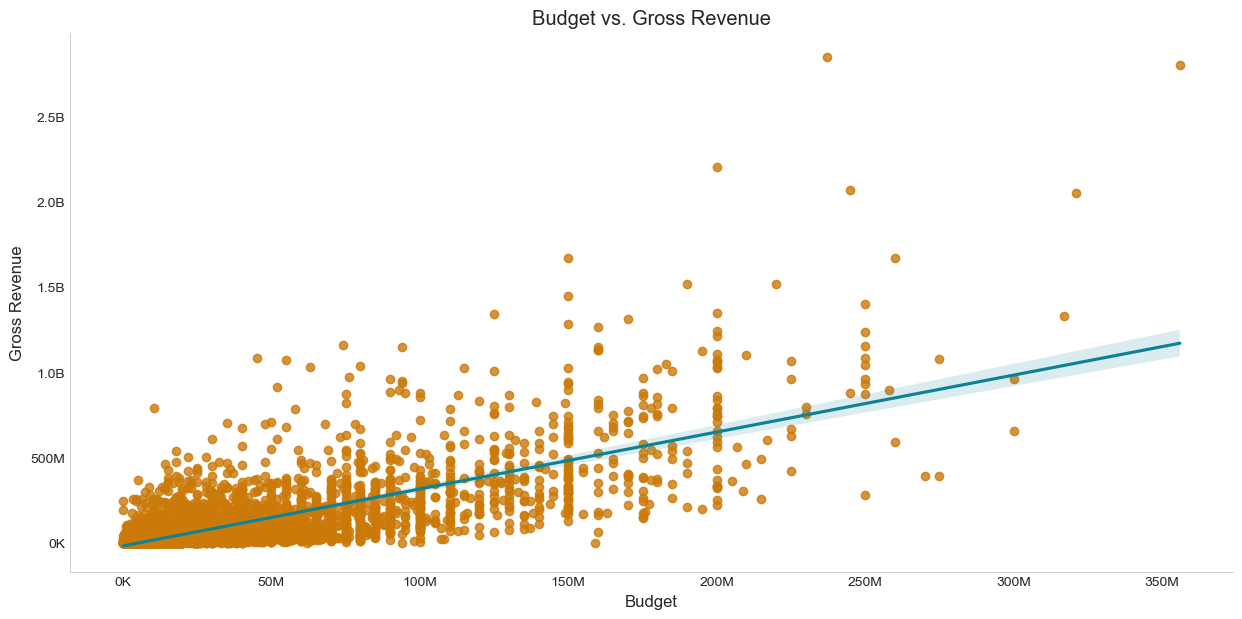

In [50]:
# custom colors for use across graphs. 
colors = {
    'aqua':'#0d8295',
    'gold': '#cb7a09'
}

# Custom formatter function
def millions_billions_formatter(x, pos):
    if x >= 1e9:  # Billion
        return '{:.1f}B'.format(x * 1e-9)
    elif x >= 1e6:  # Million
        return '{:.0f}M'.format(x * 1e-6)
    else:
        return '{:.0f}K'.format(x * 1e-3)  # Thousands
        
# plot the budget and gross to see if they are correlated. 
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color':colors['gold']}, line_kws = {'color':colors['aqua']})

# title and labels
plt.title('Budget vs. Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

# Set the custom formatter
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(millions_billions_formatter))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_billions_formatter))

#adjust spine setting to improve appearance
plt.gca().spines['bottom'].set_color('#BBBBBB')
plt.gca().spines['bottom'].set_linewidth(0.5)

plt.gca().spines['left'].set_color('#BBBBBB')
plt.gca().spines['left'].set_linewidth(0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [51]:
df.corr(method= 'pearson') # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


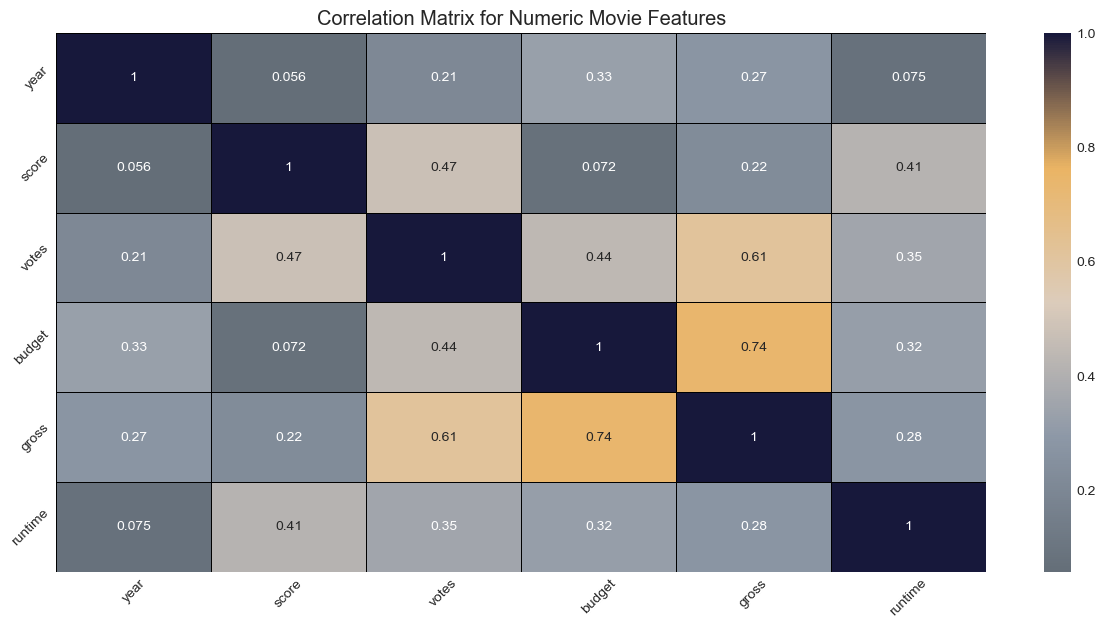

In [52]:
from matplotlib.colors import LinearSegmentedColormap


# Define the colors
first = '#646E78'
second = '#8D98A7'
third = '#DCCCBB'
fourth = '#EAB464'
fifth = '#17183B'

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_gold_aqua', [first, second, third, fourth, fifth], N=256)

# Create the correlation matrix
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(15, 7))
plt.style.use('seaborn-white')

# Create the heatmap using the custom colormap
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap, linewidths=0.5, linecolor='black')

# Title and labels (optional)
plt.title('Correlation Matrix for Numeric Movie Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust plot setting to improve appearance
plt.gca().spines['bottom'].set_color('#BBBBBB')
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_color('#BBBBBB')
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


In [53]:
# encoding all of the columns to run a quick correlation for string values. 
df_encoded = df

for col_name in df_encoded.columns:
    if (df_encoded[col_name].dtype == 'object'):
        df_encoded[col_name] = df_encoded[col_name].astype('category')
        df_encoded[col_name] = df_encoded[col_name].cat.codes
    
df_encoded

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0,35
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0,14
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108.0,21
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85.0,2


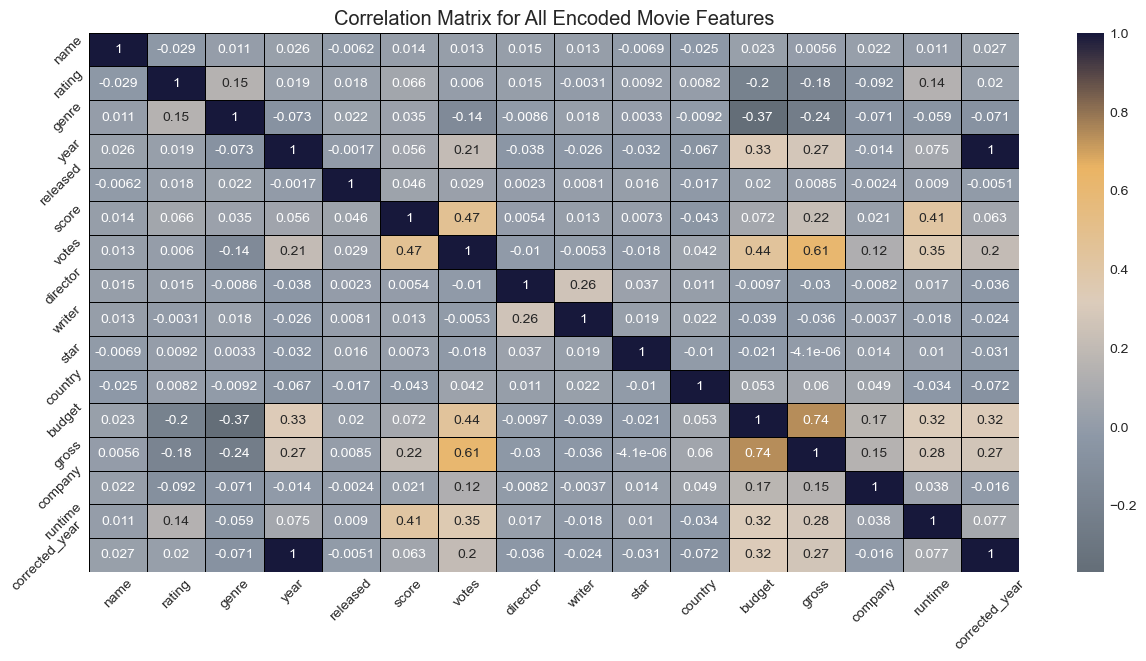

In [54]:
# Define the colors
first = '#646E78'
second = '#8D98A7'
third = '#DCCCBB'
fourth = '#EAB464'
fifth = '#17183B'

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_gold_aqua', [first, second, third, fourth, fifth], N=256)

# Create the correlation matrix
corr_matrix = df_encoded.corr(method='pearson')

plt.figure(figsize=(15, 7))
plt.style.use('seaborn-white')

# Create the heatmap using the custom colormap
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, linecolor='black', cmap = custom_cmap)

# Title and labels (optional)
plt.title('Correlation Matrix for All Encoded Movie Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust plot setting to improve appearance
plt.gca().spines['bottom'].set_color('#BBBBBB')
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_color('#BBBBBB')
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [55]:
df_encoded.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026759
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019560
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.070699
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.996723
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005141
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.062648
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.204183
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035738
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.023603
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.030840


In [56]:
# pulls those correlated values above .5

enc_corr_matrix = df_encoded.corr()
corr_pairs = enc_corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs)> .5]
high_corr

votes           gross             0.614751
gross           votes             0.614751
                budget            0.740247
budget          gross             0.740247
corrected_year  year              0.996723
year            corrected_year    0.996723
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
dtype: float64

#### It appears that Votes and Budget have the highest correlation to the gross revenue returned. Unlike I previously thought, there doesn't appear to be a strong connection of gross revenue to the company that made it. 